<a href="https://colab.research.google.com/github/laurindodumba/Trabalho-em-de-Vis-o-Comptuacional-UFSC/blob/main/%C3%8Dndice_de_Vegeta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy
from skimage import morphology
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Carregue a imagem da planta (deve ser uma imagem de infravermelho próximo e vermelho)
imagem = cv2.imread('/content/drive/MyDrive/Agricultura de Precisão - UFSC/Scripts/seg_doenca_folha_ARRUMAR/train2/base_de_dados/Cópia de train_batch0.jpg')

#pastas = os.listdir('base_de_dados//content/drive/MyDrive/Agricultura de Precisão - UFSC/Scripts/seg_doenca_folha_ARRUMAR/train2/base_de_dados/Cópia de train_batch0.jpg')

In [ ]:
# Converta a imagem para float32 para cálculos precisos
imagem = imagem.astype(np.float32)

# Extraia os canais de infravermelho próximo (NIR) e vermelho (RED)
nir = imagem[:, :, 0]
red = imagem[:, :, 2]


# Calcule a matriz de correlação entre NIR e RED
correlation_matrix = np.corrcoef(nir.ravel(), red.ravel())

# Calcule o NDWI
ndwi = (nir - red) / (nir + red)
_, binary_image = cv2.threshold(nir, 100, 255, cv2.THRESH_BINARY)

# Calcule a área da lesão
lesion_area = np.sum(binary_image) / 255.0

# Calcule a forma da folha
contours, _ = cv2.findContours(binary_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(contours) > 0:
    largest_contour = max(contours, key=cv2.contourArea)
    perimeter = cv2.arcLength(largest_contour, True)
    area = cv2.contourArea(largest_contour)
    aspect_ratio = area / (perimeter ** 2)

# Calcule características de textura usando GLCM (Grey-Level Co-occurrence Matrix)
glcm = greycomatrix(nir.astype(np.uint8), [1], [0], symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

# Calcule a entropia da imagem
entropy = shannon_entropy(nir)

<ipython-input-22-45269364fad4>:13: RuntimeWarning: invalid value encountered in divide
  ndwi = (nir - red) / (nir + red)
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [ ]:
contours

In [ ]:
# Criar um DataFrame com todas as features
df = pd.DataFrame({
    #'NDVI': ndvi.ravel(),
    #'EVI': evi.ravel(),
    #'SAVI': savi.ravel(),
    'Correlation': correlation_matrix[0, 1],
    'NDWI': ndwi.ravel(),
    'Lesion_Area': lesion_area,
    'Aspect_Ratio': aspect_ratio,
    'Contrast': contrast,
    'Homogeneity': homogeneity,
    'Entropy': entropy,
    #'Texture_STD': texture_std
})

# Salvar o DataFrame em um arquivo CSV
df.to_csv('detecao_doencas_plantas.csv', index=False)

In [ ]:
# Salvar os dados no formato CSV
df.to_csv('indices_vegetacao_com_features.csv', index=False)

In [ ]:
df = pd.read_csv('/content/detecao_doencas_plantas.csv')
df.head()

,Correlation,NDWI,Lesion_Area,Aspect_Ratio,Contrast,Homogeneity,Entropy
0,0.538784,-0.253071,2.629064e+06,0.004698,260.266803,0.269622,7.643178
1,0.538784,-0.253071,2.629064e+06,0.004698,260.266803,0.269622,7.643178
2,0.538784,-0.256158,2.629064e+06,0.004698,260.266803,0.269622,7.643178
3,0.538784,-0.256158,2.629064e+06,0.004698,260.266803,0.269622,7.643178
4,0.538784,-0.245000,2.629064e+06,0.004698,260.266803,0.269622,7.643178


from matplotlib import pyplot as plt
_df_15['NDWI'].plot(kind='hist', bins=20, title='NDWI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Correlation']
  ys = series['NDWI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('Correlation', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Correlation')
_ = plt.ylabel('NDWI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Correlation']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Correlation'}, axis=1)
              .sort_values('Correlation', ascending=True))
  xs = counted['Correlation']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('Correlation', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Correlation')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Lesion_Area']
  ys = series['NDWI']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Lesion_Area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Lesion_Area')
_ = plt.ylabel('NDWI')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Lesion_Area']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Lesion_Area'}, axis=1)
              .sort_values('Lesion_Area', ascending=True))
  xs = counted['Lesion_Area']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Lesion_Area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Lesion_Area')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_20['NDWI'].plot(kind='line', figsize=(8, 4), title='NDWI')
plt.gca().spines[['top', 'right']].set_visible(False)

# 2.0 CONSTRUÇÃO DO MODELO

In [ ]:
X = df.drop(['NDWI'], axis = 1) #Selecção da feature Target para em seguida realizar as previsões
y = df['NDWI']

In [ ]:
# Criar os rótulos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Padronização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #media 0 e desvio padrão 1

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)


X_train_sc = pd.DataFrame(X_train_sc)
X_train_sc.columns = X_train.columns

X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc.columns = X_train.columns


In [ ]:
#Validação cruzada e seleção de variáveis

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

score = cross_val_score(modelo_linear, X_train_sc, y_train, cv = 10)

print(np.mean(score))

-2.6415843573213136e-06


In [ ]:

#Seleção  do número de features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

max_f = 20

lista_r2 = list()

for i in range(1, max_f+1):

  selector = RFE(modelo_linear, n_features_to_select=i, step=1)

  selector = selector.fit(X_train_sc, y_train)

  mask = selector.support_

  features = X_train_sc.columns

  sel_features = features[mask]

  X_sel = X_train_sc[sel_features]

  modelo_linear = LinearRegression()

  score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')

  lista_r2.append(np.abs(np.mean(score)))

  print(np.abs(np.mean(score)))



5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775
5102.840625232775


In [ ]:
#Seleção de features

modelo_linear = LinearRegression()

selector = RFE(modelo_linear, n_features_to_select = 10, step=1)

selector = selector.fit(X_train_sc, y_train)

mask = selector.support_

features = X_train_sc.columns

sel_features = features[mask]

print(sel_features)

Index(['Correlation', 'Lesion_Area', 'Aspect_Ratio', 'Contrast', 'Homogeneity',
       'Entropy'],
      dtype='object')


In [ ]:
# Validação cruzada

modelo_linear = LinearRegression()

X_sel = X_train_sc[sel_features]

score = cross_val_score(modelo_linear, X_sel, y_train, cv = 10, scoring = 'r2')

print(np.mean(score))

-2.6415843573213136e-06


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

modelo_linear = LinearRegression()

modelo_linear.fit(X_sel, y_train)

coef = modelo_linear.coef_

print(coef)

r2 = modelo_linear.score(X_train, y_train)



[0. 0. 0. 0. 0. 0.]


RMSE 5103.904127860332
MAE 4305.7249305899595
R2 -1.3702893872924449e-06


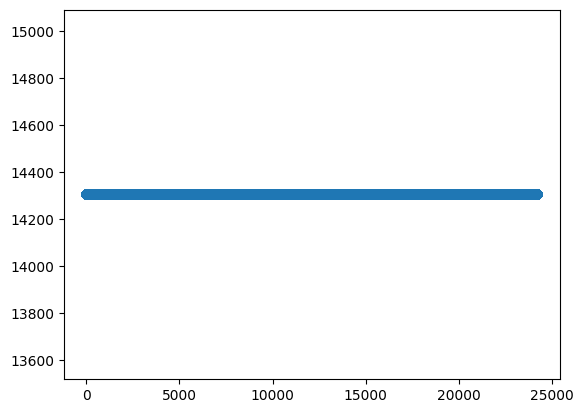

In [ ]:
#%% teste final
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt



y_pred = modelo_linear.predict(X_test_sc[features])


r2 = modelo_linear.score(X_test_sc[features], y_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5

mae = mean_absolute_error(y_test, y_pred)

print("RMSE", rmse)
print("MAE", mae)
print("R2", r2)


plt.scatter(y_test, y_pred)

plt.show()


1.0


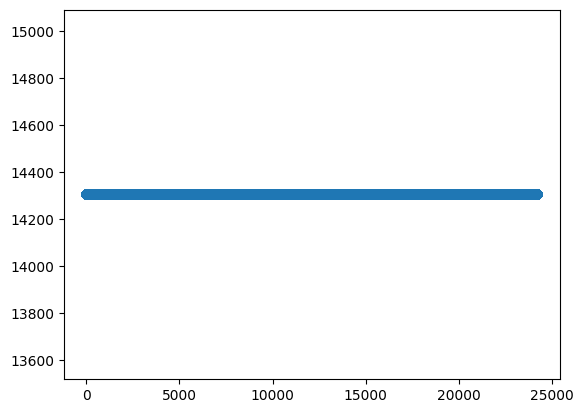

In [ ]:
model_r2 = LinearRegression()
model_r2.fit(np.array(y_test).reshape(-1, 1), y_pred)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

print(model_r2.score(np.array(y_test).reshape(-1, 1), y_pred))